## ARBOLES PARA EL ESTUDIO DEL COMERCIO


**DEFINIMOS EL GRAFO**

Peso del vértice A: 3
Peso del vértice B: 5
Peso del vértice C: 2


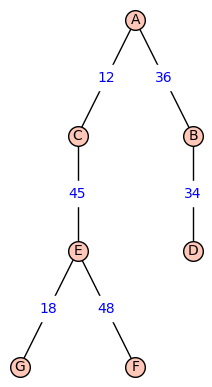

In [89]:
# Crear un grafo
G = Graph()

# Agregar vértices
G.add_vertices(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Asignar pesos a los vértices
G.set_vertices({'A': {'weight': 3}, 'B': {'weight': 5}, 'C': {'weight': 2}, 'D': {'weight': 5}, 'E': {'weight': 5}
               , 'F': {'weight': 5}, 'G': {'weight': 5}})

# Agregar aristas
aristas=[('A','B',36),('A','C',12),('B','D',34),('C','E',45),('E','F',48),('E','G',18)]
G.add_edges(aristas)

# Obtener el peso de un vértice específico
peso_A = G.get_vertex('A')['weight']
peso_B = G.get_vertex('B')['weight']
peso_C = G.get_vertex('C')['weight']

# Imprimir resultados
print("Peso del vértice A:", peso_A)
print("Peso del vértice B:", peso_B)
print("Peso del vértice C:", peso_C)
G.plot(layout='tree', edge_labels=True)

**DEFINIMOS EL ALGORITMO**

In [109]:
def importancia(capital, g, nodo=None):
    """
    Calcula la importancia de cada vértice en un arbol.

    Parameters:
        - capital: El vértice desde el cual se calcula la importancia.
        - g: El grafo ponderado.
        - nodo: Opcional, si se especifica, devuelve la importancia solo para ese nodo.

    Returns:
        Un diccionario donde las claves son los vértices y los valores son las medidas de importancia.
        Si se especifica el parámetro 'nodo', devuelve la importancia solo para ese nodo.
    """
    # Inicializar el diccionario de importancia
    importante={}
    
    # Verificar si el grafo es un árbol
    if not g.is_tree():
        raise ValueError("El grafo no es un arbol. Lo has copiado mal listillo. :)")
    elif not es_ponderado_por_vertices(g):
        raise ValueError("El grafo no está ponderado por vertices. Lo has copiado mal listillo. :)")
    else:
        
        # Definir una función interna para calcular la importancia recursivamente
        def calcular_importancia(v):
            """
            Calcula la importancia de cada vértice en un árbol.

            Parameters:
                - v: El vértice actual para el cual se calcula la importancia.

            Returns:
                Un valor que representa la importancia del vértice actual en el árbol.
            """
            # Calcular el peso y la distancia desde la capital hasta el vértice actual
            peso = g.get_vertex(v)['weight']
            distancia = g.shortest_path_length(capital, v, by_weight=True)
            
            # Calcular la importancia para el vértice actual
            valor = peso / distancia
            
            # Sumar la importancia de los hijos y los hijos de los hijos
            suma_hijos = sum(calcular_importancia(hijo) for hijo in children(g,v))
            return valor + suma_hijos
        
        # Calcular la importancia final para cada vértice en el grafo
        for v in g.vertices():
            if not v == capital:
                valor = calcular_importancia(v)
                importante[v] = valor
        
        if nodo==None:
            return importante
        else:
            return importante[nodo]

def children(t,r=None):
    """
    Devuelve una lista que contiene los hijos del nodo dado perteneciente al árbol.

    Parameters:
        - t: El árbol.
        - r: El nodo dado.

    Returns:
        Un diccionario donde las claves son los vértices y los valores la lista de hijos del nodo.
        Si se especifica el parámetro 'r', devuelve la lista de hijos del nodo.
    """
    dic = {}
    lista_visitados = []
    for v in t.vertices():
        lista_visitados.append(v)
        vecinos = t.neighbors(v)
        hijos = [elemento for elemento in vecinos if elemento not in lista_visitados]
        dic[v] = hijos
        
    if r==None:
        return dic
    else:
        return dic[r]

def es_ponderado_por_vertices(grafo):
    """
    Verifica si un grafo es ponderado por vertices.

    Parameters:
        - grafo: El grafo a verificar.

    Returns:
        True si todos los vertices tienen un peso, False de lo contrario.
    """
    for v in grafo.vertices():
        datos = grafo.get_vertex(v)
        if not isinstance(datos, dict) or 'weight' not in datos:
            return False
    return True

**PROBAMOS EL ALGORITMO**

In [110]:
dic =importancia('A',G)
print('Las importancias de cada nodo del arbol:',dic)

dic = importancia('A',G, 'D')
print('La importancias del nodo D:',dic)

dic = es_ponderado_por_vertices(G)
print('¿Los nodos del grafo G tienen valores?',dic)

G1 = Graph({'a':['d','e','f'],'b':['d','g','h'],'c':['d']})
dic = es_ponderado_por_vertices(G1)
print('¿Los nodos del grafo G1 tienen valores?',dic)

dic = children(G)
print('Hijos de cada nodo del arbol G:',dic)

dic = children(G, 'A')
print('Hijos del nodo A del arbol G:',dic)

Las importancias de cada nodo del arbol: {'B': 53/252, 'C': 1471/3990, 'D': 1/14, 'E': 403/1995, 'F': 1/21, 'G': 1/15}
La importancias del nodo D: 1/14
¿Los nodos del grafo G tienen valores? True
¿Los nodos del grafo G1 tienen valores? False
Hijos de cada nodo del arbol G: {'A': ['B', 'C'], 'B': ['D'], 'C': ['E'], 'D': [], 'E': ['F', 'G'], 'F': [], 'G': []}
Hijos del nodo A del arbol G: ['B', 'C']


**PROBAMOS LOS ERRORES PERSONALIZADOS**

In [111]:
G1 = Graph({'a':['d','e','f'],'b':['d','g','h'],'c':['d']})
print('¿Los nodos tienen valores?',es_ponderado_por_vertices(G1))
importancia('a', G1)

¿Los nodos tienen valores? False


ValueError: El grafo no está ponderado por vertices. Lo has copiado mal listillo. :)

In [112]:
G1 = Graph({'a':['b','c','f'],'b':['d'],'c':['e'], 'e':['g','f']})
print('¿Es arbol?', G1.is_tree())
importancia('a', G1)

¿Es arbol? False


ValueError: El grafo no es un arbol. Lo has copiado mal listillo. :)